<a href="https://colab.research.google.com/github/prapcode/Global-Terrorism-Analysis/blob/main/CH_%5BPrabhat_Dixit%5D_%5BGlobal_Terrorism_Analysis_Capstone_Project_ipynb%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.**
##**Explore and analyze the data to discover key findings pertaining to terrorist activities.** 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
import seaborn as sns
from scipy.stats import mode


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
file_path = '/content/drive/MyDrive/Almabetter/Global Terrorism Data.csv'
df=pd.read_csv(file_path, encoding='ISO-8859-1' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
df.shape

(181691, 135)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [123]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [124]:
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]
sub_df.rename(columns = {'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','nwound':'total_wounds','gname':'terrorist_group'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
sub_df.head(3)

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,total_wounds,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown


### **Top 10  rivalries**

In [126]:
gname_country=sub_df[sub_df['terrorist_group']!='Unknown'].copy()
group_attacks=gname_country.groupby(['terrorist_group','country']).agg({'terrorist_group':'count'}).rename(columns={'terrorist_group':'no_of_attacks'}).reset_index().nlargest(10,'no_of_attacks')
group_attacks

,terrorist_group,country,no_of_attacks
4666,Taliban,Afghanistan,7423
2251,Islamic State of Iraq and the Levant (ISIL),Iraq,4797
4405,Shining Path (SL),Peru,4541
1612,Farabundo Marti National Liberation Front (FMLN),El Salvador,3330
271,Al-Shabaab,Somalia,2867
3423,New People's Army (NPA),Philippines,2770
2181,Irish Republican Army (IRA),United Kingdom,2575
4049,Revolutionary Armed Forces of Colombia (FARC),Colombia,2468
2666,Kurdistan Workers' Party (PKK),Turkey,2109
1061,Boko Haram,Nigeria,2087


In [127]:
country_mode=gname_country.groupby('terrorist_group')['country'].apply(lambda x: x.mode().loc[0]).reset_index()
country_mode.head(3)

,terrorist_group,country
0,1 May,Greece
1,14 K Triad,Macau
2,14 March Coalition,Lebanon


In [128]:
top_df = pd.merge(left=country_mode,right=group_attacks,on=['terrorist_group','country'],how='left').nlargest(10,'no_of_attacks')
top_df

,terrorist_group,country,no_of_attacks
3138,Taliban,Afghanistan,7423.0
1535,Islamic State of Iraq and the Levant (ISIL),Iraq,4797.0
2948,Shining Path (SL),Peru,4541.0
1120,Farabundo Marti National Liberation Front (FMLN),El Salvador,3330.0
177,Al-Shabaab,Somalia,2867.0
2266,New People's Army (NPA),Philippines,2770.0
1484,Irish Republican Army (IRA),United Kingdom,2575.0
2717,Revolutionary Armed Forces of Colombia (FARC),Colombia,2468.0
1800,Kurdistan Workers' Party (PKK),Turkey,2109.0
704,Boko Haram,Nigeria,2087.0


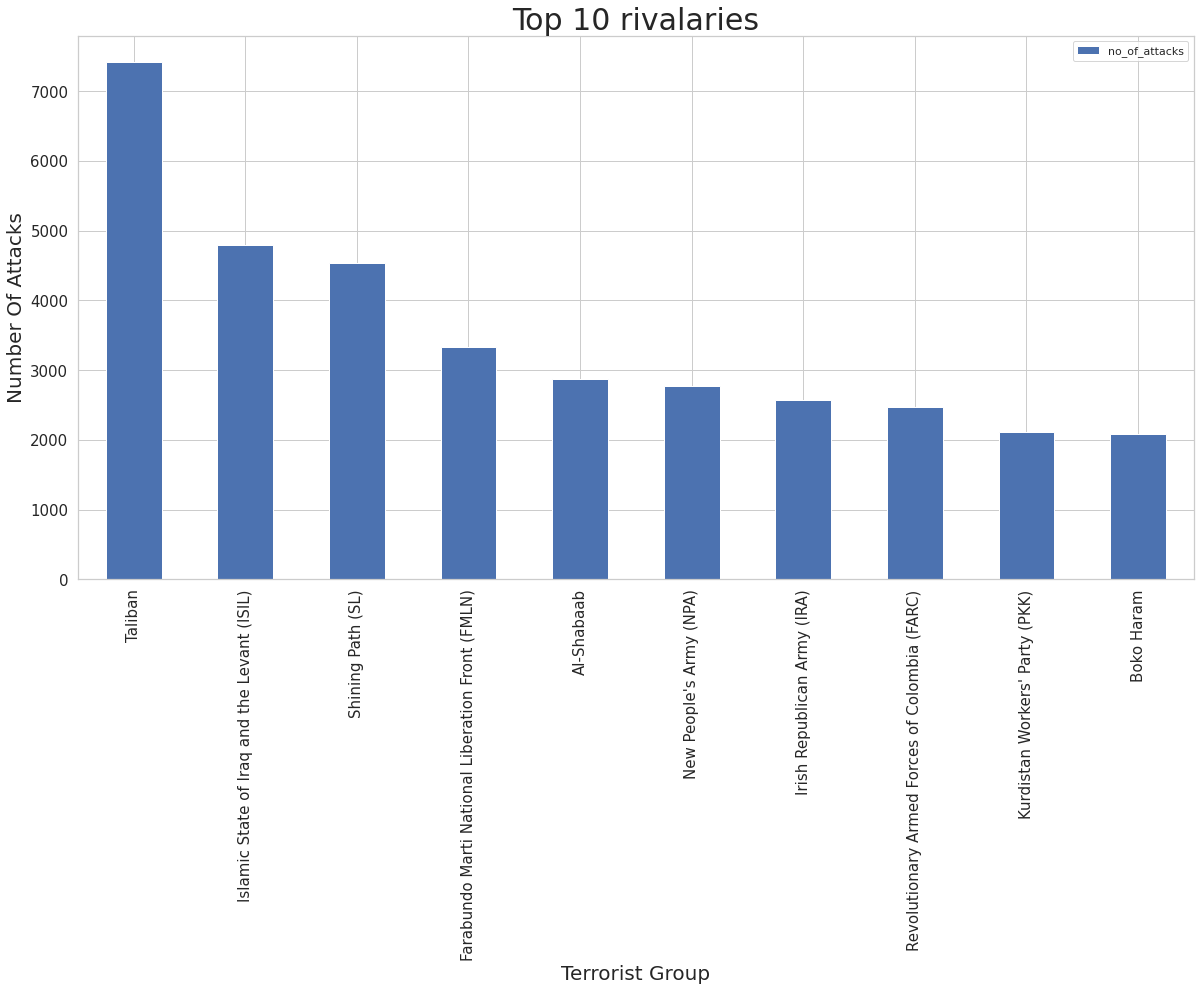

In [118]:
plt.rcParams["figure.figsize"] = (20, 10)
a = top_df.plot(kind='bar', x='terrorist_group',y ='no_of_attacks')
# a.annotate('Afghanistan', (0,7430), fontsize= 16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('Terrorist Group', fontsize=20)
plt. ylabel('Number Of Attacks', fontsize=20)
plt.title('Top 10 rivalaries', fontsize=30)
plt.show()

### Taliban has the highest number of attacks till date and they mostly operate in Afghanistan.

##**No. of attack happened  each year in India**

In [129]:
df_number_of_attacks_by_years =df_India['year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')
df_number_of_attacks_by_years

,year,number_of_attacks
0,2016,1025
1,2017,966
2,2015,884
3,2014,860
4,2013,694
5,2009,672
6,2010,663
7,2011,645
8,2012,611
9,2008,534


Text(0.5, 1.0, 'number of attacks each year in India')

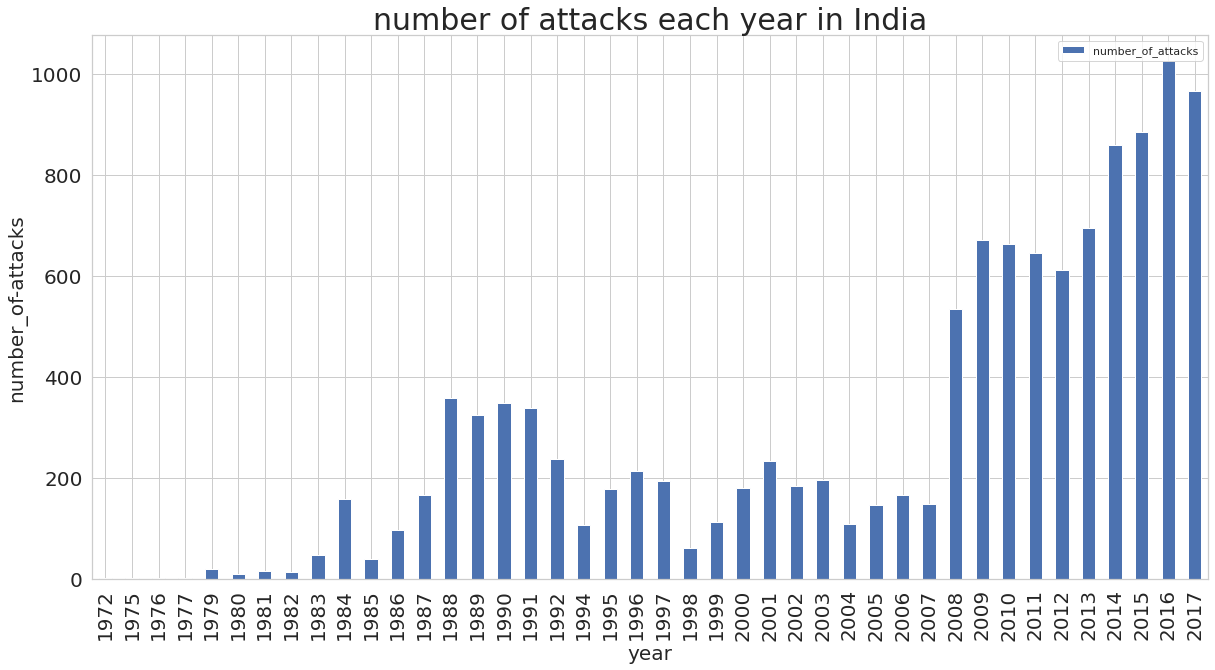

In [133]:
plt.rcParams['figure.figsize']=(20,10)
df_number_of_attacks_by_years.sort_values('year',ascending= True).plot(kind='bar',x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('number_of-attacks', fontsize=20)
plt.title('number of attacks each year in India', fontsize=30)

### Year 2016 has the highest number of attack in India with total number of 1025 attacks in a year.

##**No. of citizens killed each year in India**

In [86]:
kills_per_year_india=df_India.groupby('year').agg({'total_kills':'sum'})
kills_per_year_india.reset_index(inplace=True)
kills_per_year_india

,year,total_kills
0,1972,0.0
1,1975,4.0
2,1976,0.0
3,1977,0.0
4,1979,31.0
5,1980,17.0
6,1981,24.0
7,1982,64.0
8,1983,59.0
9,1984,195.0


Text(0.5, 1.0, 'total number of kills each year in India')

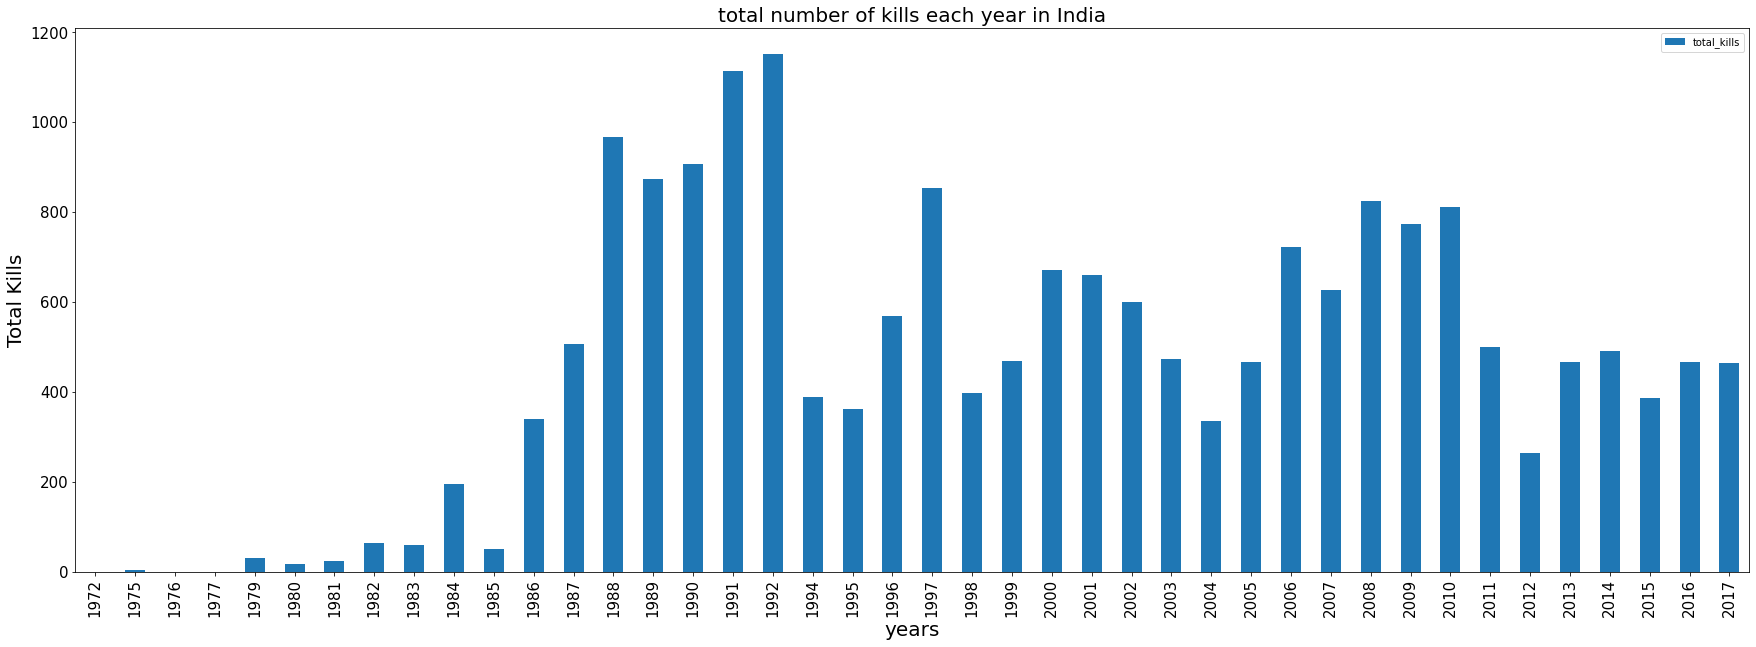

In [100]:
kills_per_year_india.sort_values('year',ascending= True).plot(kind='bar',x='year',y='total_kills')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('years', fontsize=20)
plt. ylabel('Total Kills', fontsize=20)
plt.title('total number of kills each year in India', fontsize=20)

###1992 was the year where the most number of  citizen were killed with total number is 1152.

##**Target Wise Analysis in India**

In [96]:
target_df=df_India[['target_type','total_kills']]

In [97]:
target_df.target_type.isna().sum()

0

In [98]:
target_wise=target_df.groupby('target_type').agg({'target_type':'count','total_kills':'sum'}).rename(columns={'target_type':'total_attacks'}).sort_values('total_attacks',ascending=False)

In [99]:
target_wise

,total_attacks,total_kills
target_type,,
Private Citizens & Property,3144,7011.0
Police,2299,4275.0
Government (General),1727,1516.0
Business,1131,938.0
Military,916,1990.0
Transportation,831,2095.0
Unknown,598,188.0
Educational Institution,297,124.0
Violent Political Party,234,330.0


In [116]:
target_wise['total_damage']=target_wise.total_attacks+target_wise.total_kills
target_wise
target_wise.sort_values('total_damage',ascending=False)

,level_0,index,target_type,total_attacks,total_kills,total_damage
0,0,0,Private Citizens & Property,3144,7011.0,10155.0
1,1,1,Police,2299,4275.0,6574.0
2,2,2,Government (General),1727,1516.0,3243.0
5,5,5,Transportation,831,2095.0,2926.0
4,4,4,Military,916,1990.0,2906.0
3,3,3,Business,1131,938.0,2069.0
6,6,6,Unknown,598,188.0,786.0
9,9,9,Religious Figures/Institutions,214,424.0,638.0
8,8,8,Violent Political Party,234,330.0,564.0
7,7,7,Educational Institution,297,124.0,421.0


Text(0, 0.5, 'Type of Targets')

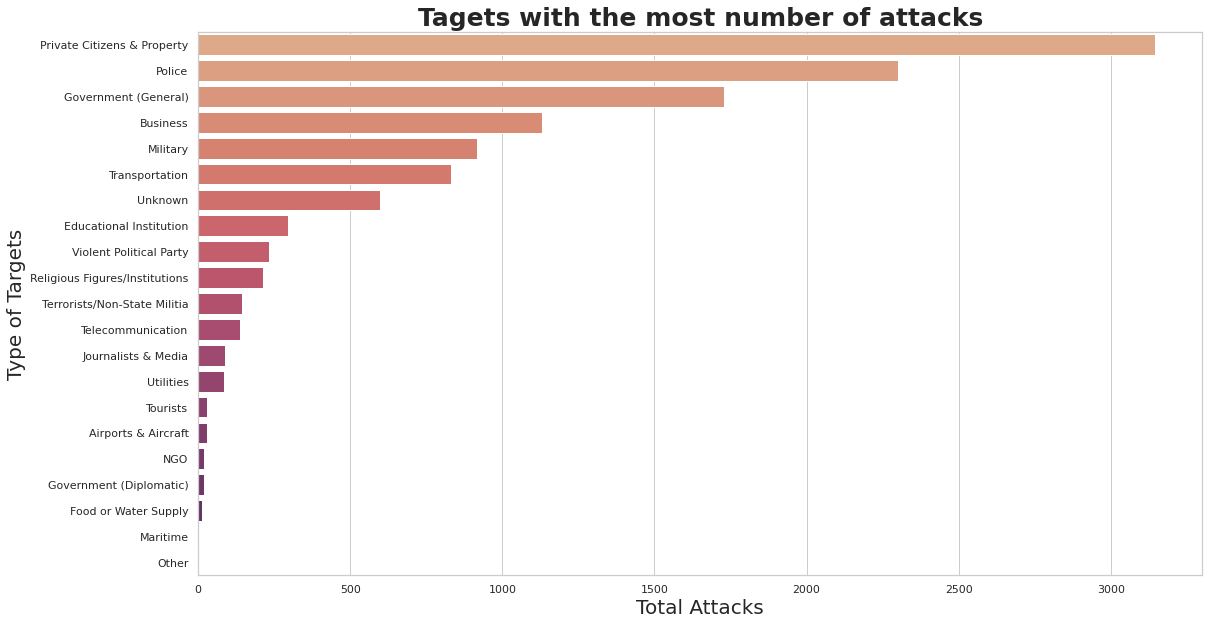

In [117]:
plt.rcParams['figure.figsize']=(18,10)
sns.set(font_scale=1)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y='target_type',data=target_wise,palette='flare')
l.set_title("Tagets with the most number of attacks",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Type of Targets',fontsize=20)

###Private Citizen and Property are the top taget with total of 3144 attacks.

In [2]:
pip install pyshp

     |████████████████████████████████| 225kB 3.9MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=299089d8dbc3ace9f014601acd2dabf8ff0ac6cd0f844c11c188e970cc33685c
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [3]:
import shapefile as shp

In [ ]:
shp_path = '/content
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)